In [7]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp

In [8]:
from ProPaST import ProPaST
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] ='/home/maqinlin/miniconda3/envs/lib/R'


In [9]:
file_fold = '/home/maqinlin/mz_project/Data/Mouse_Brain_Merge_Anterior_Posterior_Section_2/filtered_feature_bc_matrix.h5ad'
n_clusters = 26
adata = sc.read_h5ad(file_fold)
adata

AnnData object with n_obs × n_vars = 6114 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'data'
    obsm: 'spatial'

In [10]:
# define model
model = ProPaST.ProPaST(adata, n_clusters,device=device,gamma=0.1)

# run model
adata = model.train()

torch.Size([6114, 3000])
Begin to train ST data for embedding...


100%|██████████| 600/600 [00:35<00:00, 16.73it/s]


Optimization finished for ST data!
this!!!!


In [11]:
# clustering
from ProPaST.utils import clustering

tool = 'mclust' # mclust, leiden, and louvain


if tool == 'mclust':
   clustering(adata, n_clusters, method=tool) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, method=tool, start=0.1, end=2.0, increment=0.01)

fitting ...
  |======================================================================| 100%
domain is aa!!!


/home/maqinlin/miniconda3/envs/PPGCL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


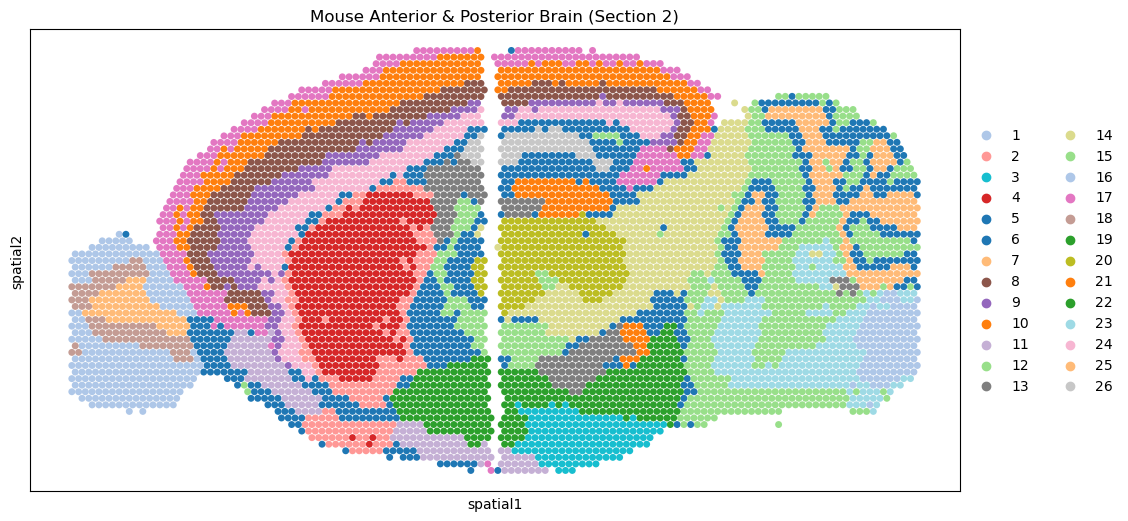

In [12]:
# plotting spatial clustering result
import matplotlib.pyplot as plt
import seaborn as sns
adata.obsm['spatial'][:,1] = -1*adata.obsm['spatial'][:,1]
rgb_values = sns.color_palette("tab20", len(adata.obs['domain'].unique()))
color_fine = dict(zip(list(adata.obs['domain'].unique()), rgb_values))

plt.rcParams["figure.figsize"] = (12, 6)
fig = sc.pl.embedding(
    adata, basis="spatial",
    color="domain",
    s=100,
    palette=color_fine,
    show=False,
    title='Mouse Anterior & Posterior Brain (Section 2)',
    return_fig=True
)
fig.savefig('/home/maqinlin/mz_project/ProPaST/ProPaST_file/batch_image/Horizontal/ProPaST_section2.pdf',
            bbox_inches='tight', dpi=300)